In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [58]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [59]:
df.shape

(103, 7)

## Data Cleaning

In [63]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\hp\AppData\Local\Temp/ipykernel_18276/313562689.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
C:\Users\hp\AppData\Local\Temp/ipykernel_18276/313562689.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","")
C:\Users\hp\AppData\Local\Temp/ipykernel_18276/313562689.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hectare)"] = df["Acreage (He

In [64]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264.303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [65]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Prouction per Person (Kg)": "Prouction per Person (Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage (Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield (Kg / Hectare)"}, inplace = True)

In [66]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264.303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [67]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [68]:
df[df['Acreage (Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [69]:
df = df.dropna().reset_index()

In [70]:
df

,index,Unnamed: 0,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,751675
1,1,1,India,Asia,348448000,260721,4950000,703935
2,2,2,China,Asia,123059739,88287,1675215,734591
3,3,3,Thailand,Asia,87468496,1264.303,1336575,654422
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,435965
98,98,98,Lebanon,Asia,97,16,3,283864
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,119498


In [71]:
df.drop(["index","Unnamed: 0"], axis = 1, inplace= True)

In [72]:
df.head()

,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264.303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [73]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)              object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [74]:
type(df["Production per Person (Kg)"][0])

str

In [75]:
df['Production per Person (Kg)'].dtype

dtype('O')

In [77]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"] = df["Yield (Kg / Hectare)"].astype(float)

In [78]:
df.dtypes

Country                        object
Continent                      object
Production(Tons)              float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [79]:
df.nunique()

Country                       102
Continent                       6
Production(Tons)              102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

## Univariate Analysis

In [80]:
df.head()

,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent?

In [82]:
df["Continent"].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<AxesSubplot:>

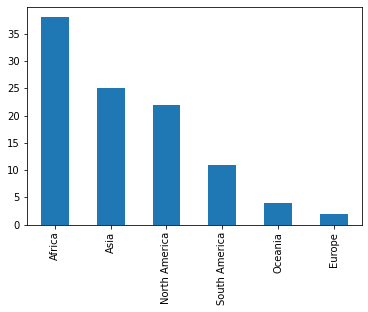

In [83]:
df["Continent"].value_counts().plot(kind= 'bar')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

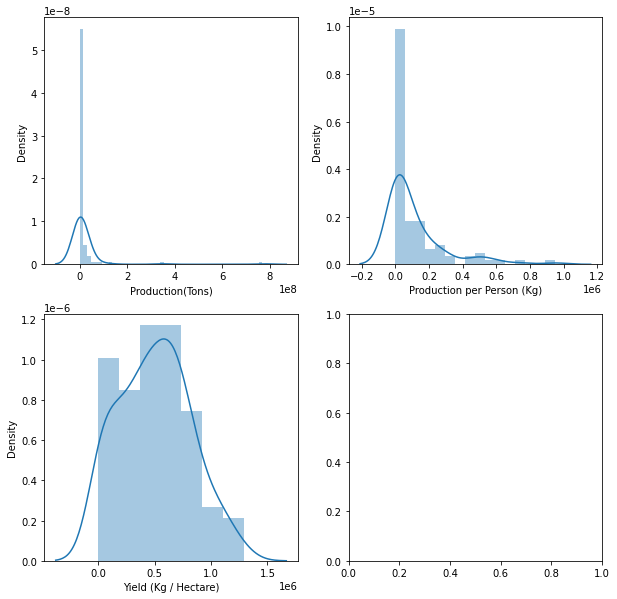

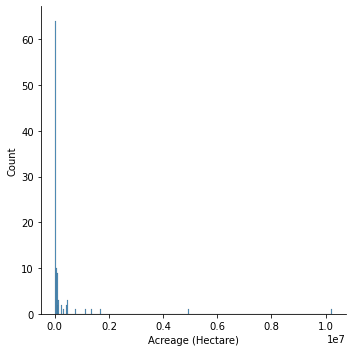

In [87]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.distplot(df["Yield (Kg / Hectare)"])
plt.subplot(2,2,4)
sns.displot(df["Acreage (Hectare)"])

## Checking Outliers

#### In analysis we cannot remove outliers as we want the Highest number of which country is producing more

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='Acreage (Hectare)'>

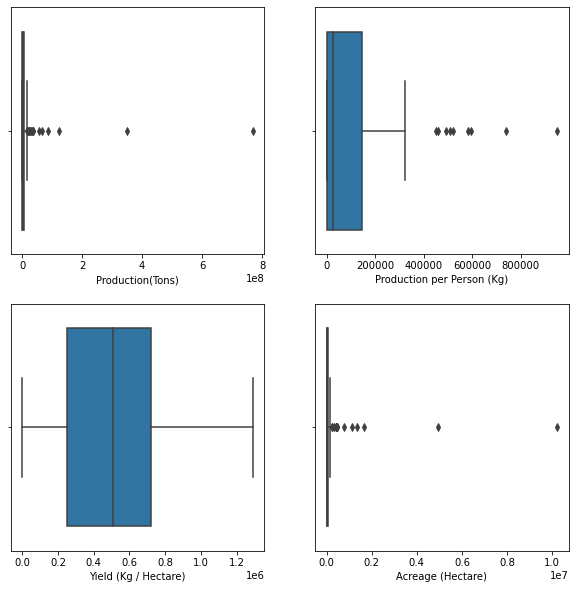

In [89]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Yield (Kg / Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Acreage (Hectare)"])

### Distribution of columns

In [91]:
df.describe()

,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,1.020000e+02
mean,1.850372e+07,112952.435755,2.498981e+05,5.018502e+05
std,8.419149e+07,176651.341929,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000,0.000000e+00,1.000000e+01
25%,6.251875e+04,3671.910000,1.104000e+03,2.487505e+05
50%,1.440044e+06,25572.500000,1.655800e+04,5.102500e+05
75%,6.426824e+06,146384.750000,8.047400e+04,7.198920e+05
max,7.686784e+08,951087.000000,1.022620e+07,1.290493e+06


## Bivariate Analysis

In [92]:
df.head()

,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?

In [93]:
df1 = df[["Country", "Production(Tons)"]].set_index("Country")

In [94]:
df1

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [95]:
df1["Production(Tons)_percent"] = df1["Production(Tons)"]*100 / df1["Production(Tons)"].sum()

In [96]:
df1

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<AxesSubplot:ylabel='Production(Tons)_percent'>

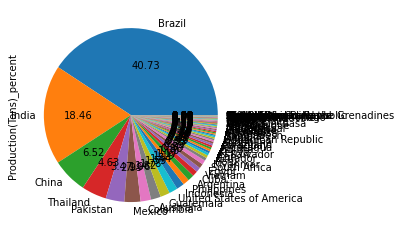

In [97]:
df1["Production(Tons)_percent"].plot(kind = "pie", autopct = '%.2f')

<AxesSubplot:xlabel='Country'>

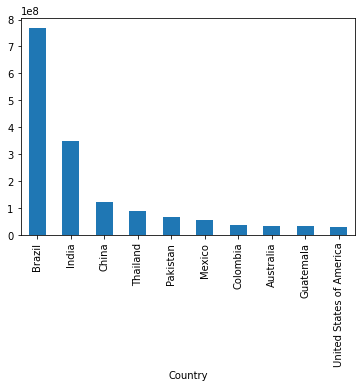

In [100]:
df1["Production(Tons)"].head(10).plot(kind= 'bar')

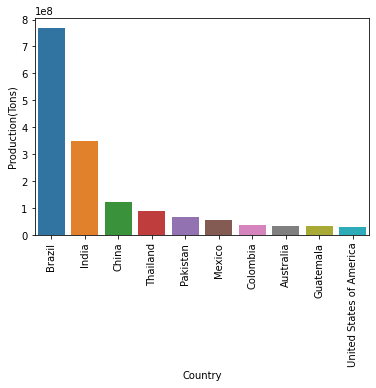

In [105]:
ax = sns.barplot(data = df.head(10), x = "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has highest land ?

In [109]:
df.head(10)

,Country,Continent,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,751675.0
1,India,Asia,348448000.0,260721.000,4950000.0,703935.0
2,China,Asia,123059739.0,88287.000,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264.303,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.000,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.000,416626.0,886915.0
7,Australia,Oceania,34403004.0,1373.406,447204.0,769291.0
8,Guatemala,North America,33533403.0,1938.114,25985.0,1290493.0
9,United States of America,North America,29926210.0,91304.000,37053.0,80766.0


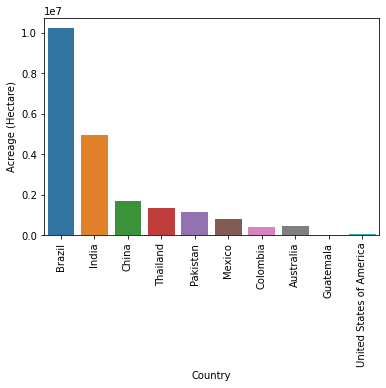

In [112]:
# This data is not sorted according to Acreage land so we need to 1st sort it out according to Acreage land
ax = sns.barplot(data = df.head(10), x = "Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

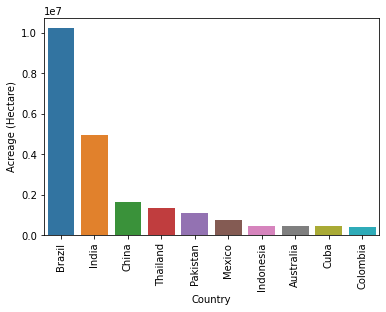

In [113]:
df_acr = df.sort_values('Acreage (Hectare)', ascending= False)
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has highest yield per hectare ?

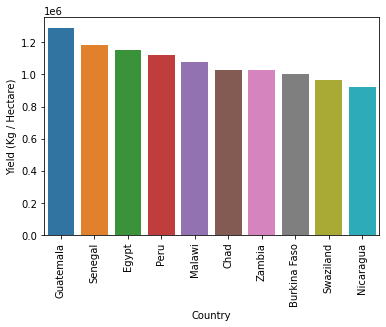

In [115]:
df_yd = df.sort_values('Yield (Kg / Hectare)', ascending= False)
ax = sns.barplot(data = df_yd.head(10), x = "Country", y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

### Which country has the highest production per person Kg ?

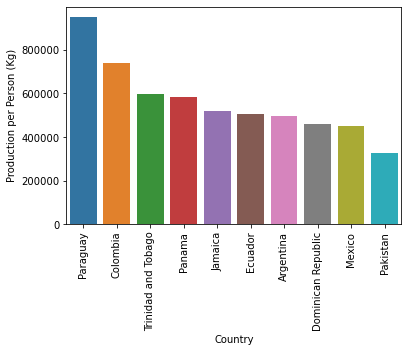

In [116]:
df_yd = df.sort_values('Production per Person (Kg)', ascending= False)
ax = sns.barplot(data = df_yd.head(10), x = "Country", y = "Production per Person (Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

## Correlation

In [118]:
# If values are closer to 1 they are more corelated and if the value is closer to "-1" they are less correlated
df.corr()

,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.121125
Production per Person (Kg),0.015000,1.000000,0.012557,-0.043603
Acreage (Hectare),0.997550,0.012557,1.000000,0.107826
Yield (Kg / Hectare),0.121125,-0.043603,0.107826,1.000000


<AxesSubplot:>

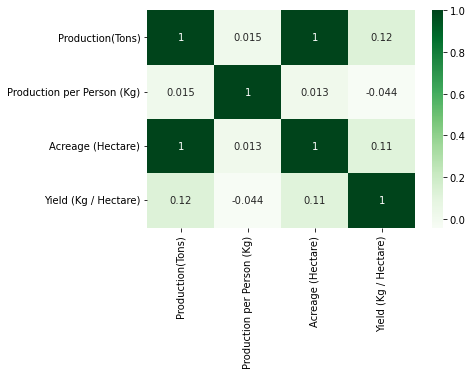

In [120]:
sns.heatmap(df.corr(), annot = True, cmap = "Greens")

### Do countries with highest land produce more sugarcane ?

<AxesSubplot:xlabel='Acreage (Hectare)', ylabel='Production(Tons)'>

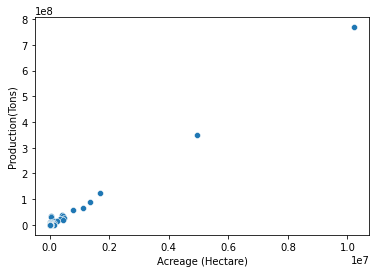

In [121]:
sns.scatterplot(data = df, x = "Acreage (Hectare)", y = "Production(Tons)" )

### Do countries which yield more sugarcane per hectare produces more sugarcan in total ?

<AxesSubplot:xlabel='Yield (Kg / Hectare)', ylabel='Production(Tons)'>

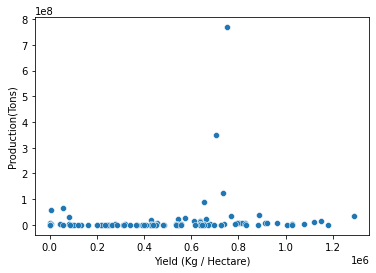

In [122]:
sns.scatterplot(data = df, x = "Yield (Kg / Hectare)", y = "Production(Tons)" )

### Analysis for Continent

In [123]:
df_continent = df.groupby("Continent").sum()

In [124]:
df_continent

,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,20700454.0
Asia,721930425.0,1857769.303,10608319.0,11197308.0
Europe,5823.0,536.000,71.0,1318709.0
North America,173995947.0,3796081.508,1581983.0,9581162.0
Oceania,36177574.0,28593.605,490909.0,1624191.0
South America,865588126.0,3505531.738,11369236.0,6766896.0


In [135]:
df['Continent'].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

### Which continent produces maximum sugarcane ?

<AxesSubplot:xlabel='Continent'>

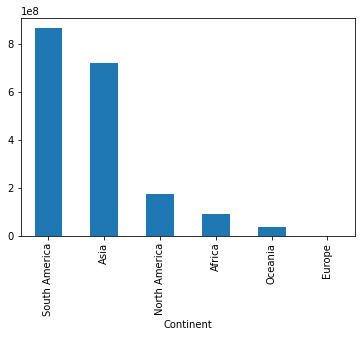

In [127]:
df_continent['Production(Tons)'].sort_values(ascending= False).plot(kind= 'bar')

<AxesSubplot:xlabel='Continent'>

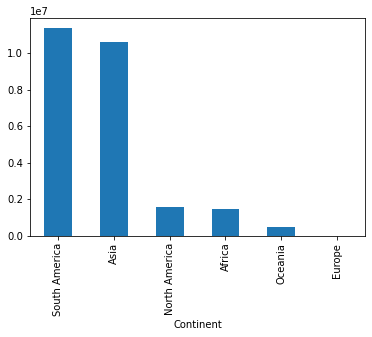

In [136]:
df_continent['Acreage (Hectare)'].sort_values(ascending= False).plot(kind= 'bar')

### Do number of countries in a continent effects production of sugarcane?

###  No

In [137]:
df['Continent'].value_counts()

Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<AxesSubplot:xlabel='Continent'>

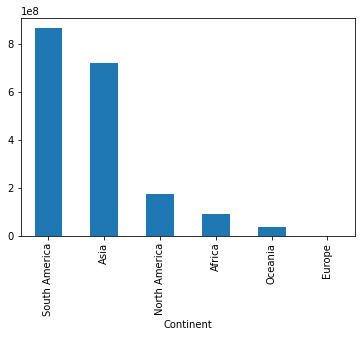

In [138]:
df_continent['Production(Tons)'].sort_values(ascending= False).plot(kind= 'bar')

In [142]:
df_continent['Number_of_countries'] = df.groupby("Continent").count()['Country']

In [143]:
df_continent

,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,20700454.0,38
Asia,721930425.0,1857769.303,10608319.0,11197308.0,25
Europe,5823.0,536.000,71.0,1318709.0,2
North America,173995947.0,3796081.508,1581983.0,9581162.0,22
Oceania,36177574.0,28593.605,490909.0,1624191.0,4
South America,865588126.0,3505531.738,11369236.0,6766896.0,11


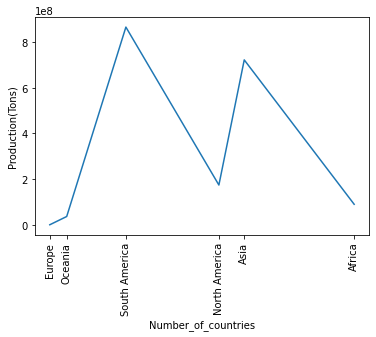

In [147]:
#Conitnent is stored to a seperate list in order to act them as an index as we dont have a index numer in the dataset here
continent_names = df_continent.index.to_list()
sns.lineplot(data= df_continent, x = "Number_of_countries", y = "Production(Tons)")
plt.xticks(df_continent['Number_of_countries'], continent_names, rotation = 90)
plt.show()

## Correlation for Continent

In [148]:
df_continent.corr()

,Production(Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.104312,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.523627,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.126764,0.132817
Yield (Kg / Hectare),0.104312,0.523627,0.126764,1.000000,0.983807
Number_of_countries,0.109244,0.540086,0.132817,0.983807,1.000000


## Production Distribution by Continent

<AxesSubplot:ylabel='Production(Tons)'>

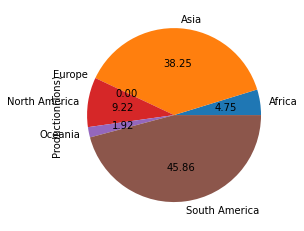

In [149]:
df_continent["Production(Tons)"].plot(kind = 'pie', autopct = '%.2f')